## Canny Edge Detection
***********************

## Objetivo

Aprender sobre:

  * Conceito de detecção de bordas com o Canny
  * Utilizar o Scikit Image para fazer a detecção de bordas: **scikit-image.feature.canny**
    
### Teoria

O Detector de Bordas Canny é um algoritmo bem popular para detecção de bordas. Ele foi desenvolvido por John F. Canny em 1986. Ele é um algoritmo multi estágio, que funciona da seguinte forma.

1. **Redução de Ruído**

Como a detecção de bordas é susceptível ao ruído na imagem, o primeiro passo é remover o ruído da imagem com um filtro Gaussiano 5x5. Já vimos isso anteriormente.

2. **Encontrando os gradientes de intensidade da imagem**

A imagem suavizada é então filtrada com um kernel  Sobel em ambas as direções, vertical e horizontal, para pegarmos as derivadas nestas direções, ($G_x$) e ($G_y$). Destas duas imagens, nós encontramos o gradiente e a direção da borda para cada pixel, da seguinte forma:

$$ Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} $$
$$   Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)  $$

A direção do gradiente é sempre perpendicular às bordas. Ele é arredondado para um dos quatro ângulos representando as direções vertical, horizozntal e as duas diagonais.

3. **Supressão de Não-máximos**

Após obtermos a magnitude do gradiente e a direção, uma varredura completa da imagem é realizada para se remover todos os pixels não necessários que não constituem uma borda. Para isto, em cada pixel, verificamos se ele é um máximo local na sua vizinhança na direção do gradiente. Veja a imagem abaixo.

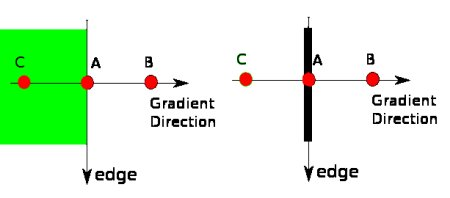
       
        
O ponto A está na borda (na direção vertical). A direção do gradiente é normal à borda. Os pontos B e C estão na direção do gradiente. Assim o ponto A é verificado com os pontos B e C para ver se eles formam um máximo local. Se for, ele é considerado para o próximo estágio, caso contrário, ele é suprimido (zerado).

Resumindo, o resultado produzirá uma imagem binária com "bordas finas".

4. **Limiarização por Histerese**

Neste estágio, decide-se quais são as bordas que realmente são bordas e quais não são. Para isso, precisamos dois valores de limiar, `minVal` e `maxVal`. Quaisquer bordas com a intensidade de gradiente mais do `maxVal` são certamente bordas e aquelas abaixo de `minVal` são certamente não-bordas, e então descartadas. Aquelas que estão entre estes dois valores de limiar são classificadas como bordas ou não-bordas baseado na sua conectividade. Se elas estão conectadas a pixels "certamente borda", elas são consideradas comom parte da borda. Caso contrário, são descartadas. Veja as imagens abaixo:

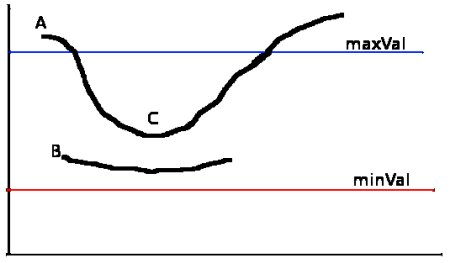

A borda A está acima do `maxVal`, assim é considerada certamente borda. Apesar de a borda C estar abaixo de `maxVal`, ela está conectada à borda A, e assim é considerada também como uma borda válida e assim teremos uma curva completa. Mas a borda B, apesar de ter um valor acima de `minVal` e estar na mesma região que a borda C, ela não está conectada a nenhuma "certamente borda", assim ela é descartada. Desta forma, é muito importante que selecionemos os valores `minVal` e `maxVal` de forma apropriada para obtermos resultados corretos.

Este estágio também remove pequenos pixels de ruído, com base na hipótese que bords são longas linhas.

Assim, o que nós conseguimos no final são bordas fortes na imagem.

In [ ]:
%matplotlib inline

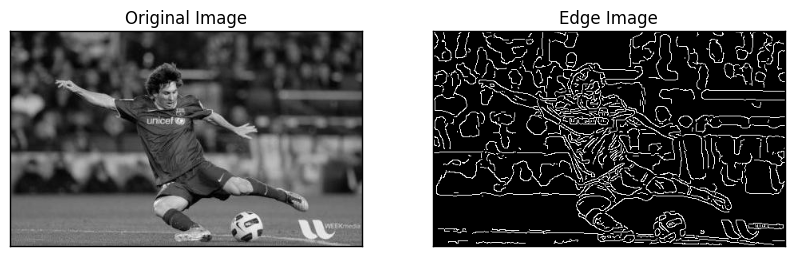

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io
from skimage import feature
from skimage.color import rgb2gray
from pylab import rcParams
from scipy import misc
rcParams['figure.figsize'] = 10, 10

img_c = io.imread('../images/messi5.jpg',0)
img = rgb2gray(img_c)
edges = feature.canny(img)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show() 

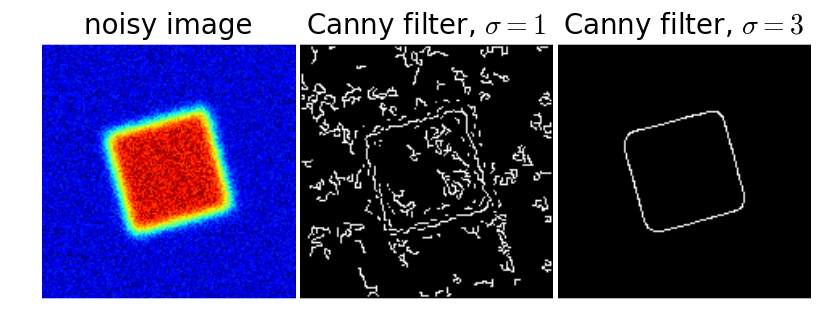

In [ ]:
# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

## Exercício


1. Explore os parâmetros disponíveis da função `canny` e comente os resultados em pelo menos três imagens.
2. Pegue uma imagem com pouco ruído (em uma análise apenas visual); adicione ruído aleatório a esta imagem e faça a detecção de bordas nas duas (original e com ruído) utilizando filtros `Sobel`, `Prewitt` e o `Canny`. Comente os resultados obtidos.

**SUBMETA**:

1. Um notebook com todas as células de execução (output);
2. Um arquivo pdf gerado a partir do notebook com todas as células de execução (output).
